In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # convert breast cancer data to Dataframe
df["target"]=iris.target

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

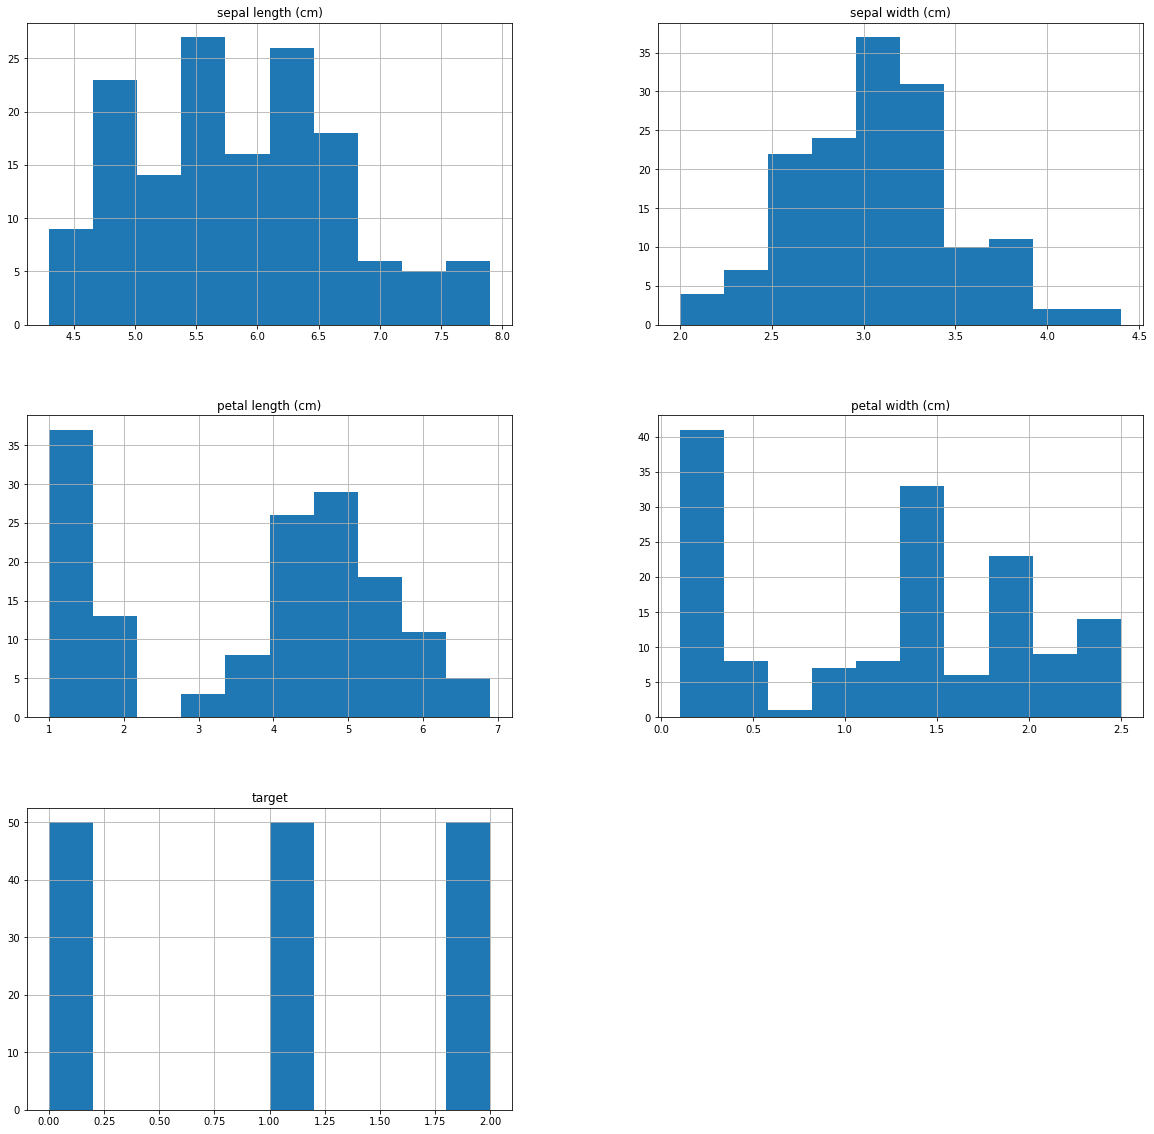

In [20]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

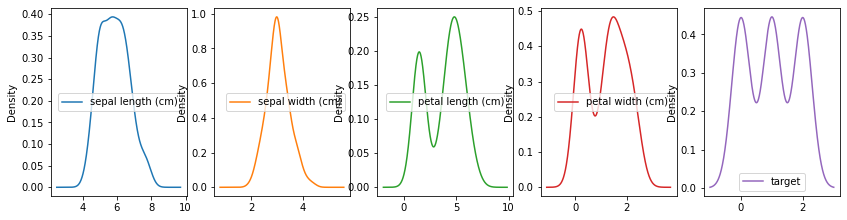

In [21]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [22]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [23]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [24]:
duplicate_values = df[df.duplicated()]
duplicate_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [25]:
df.drop_duplicates(keep='first', inplace=True)

In [26]:
duplicate_values = df[df.duplicated()]
duplicate_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


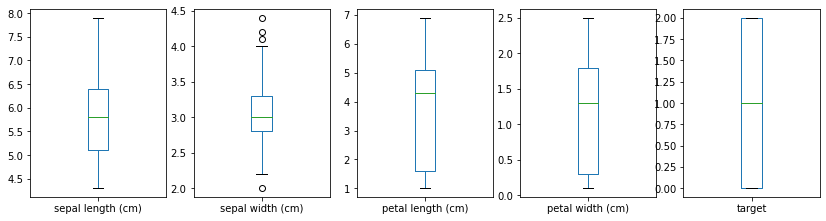

In [27]:
df.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [31]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'target').index
columns

Index(['target', 'petal width (cm)', 'petal length (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

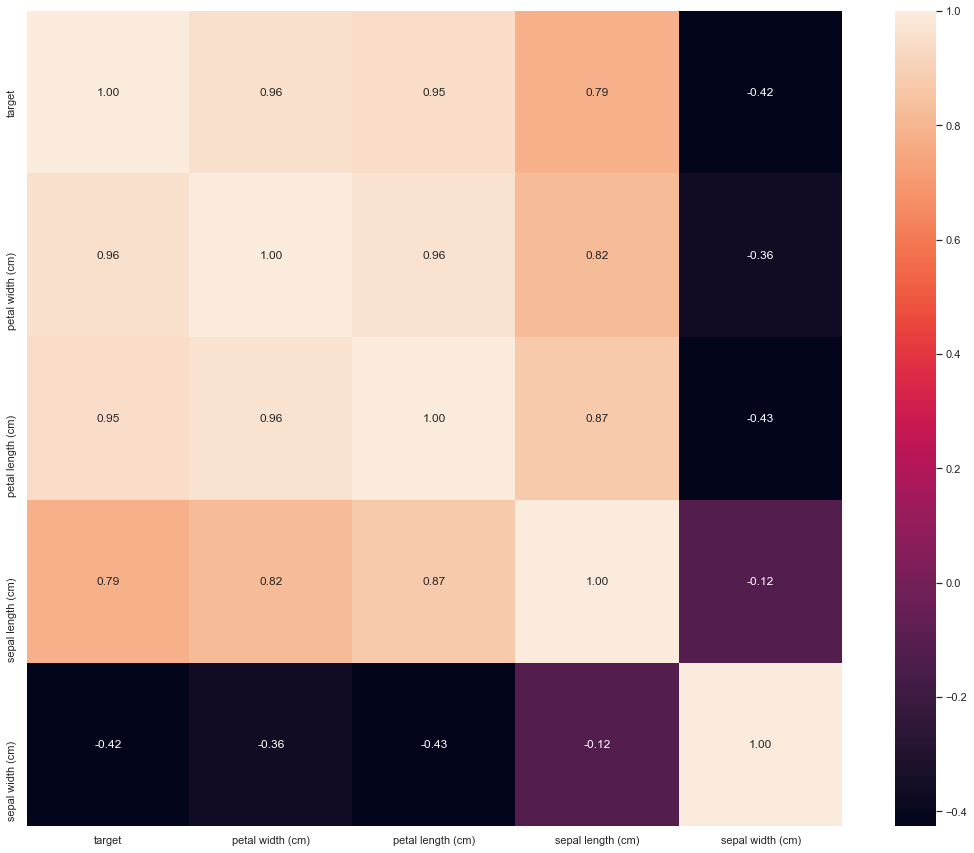

In [35]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [39]:
values = df.values

X = values[:,0:4]
Y = values[:,4]

##### Feature Scaling 

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [41]:
df_scaled = pd.DataFrame(X_scaled)

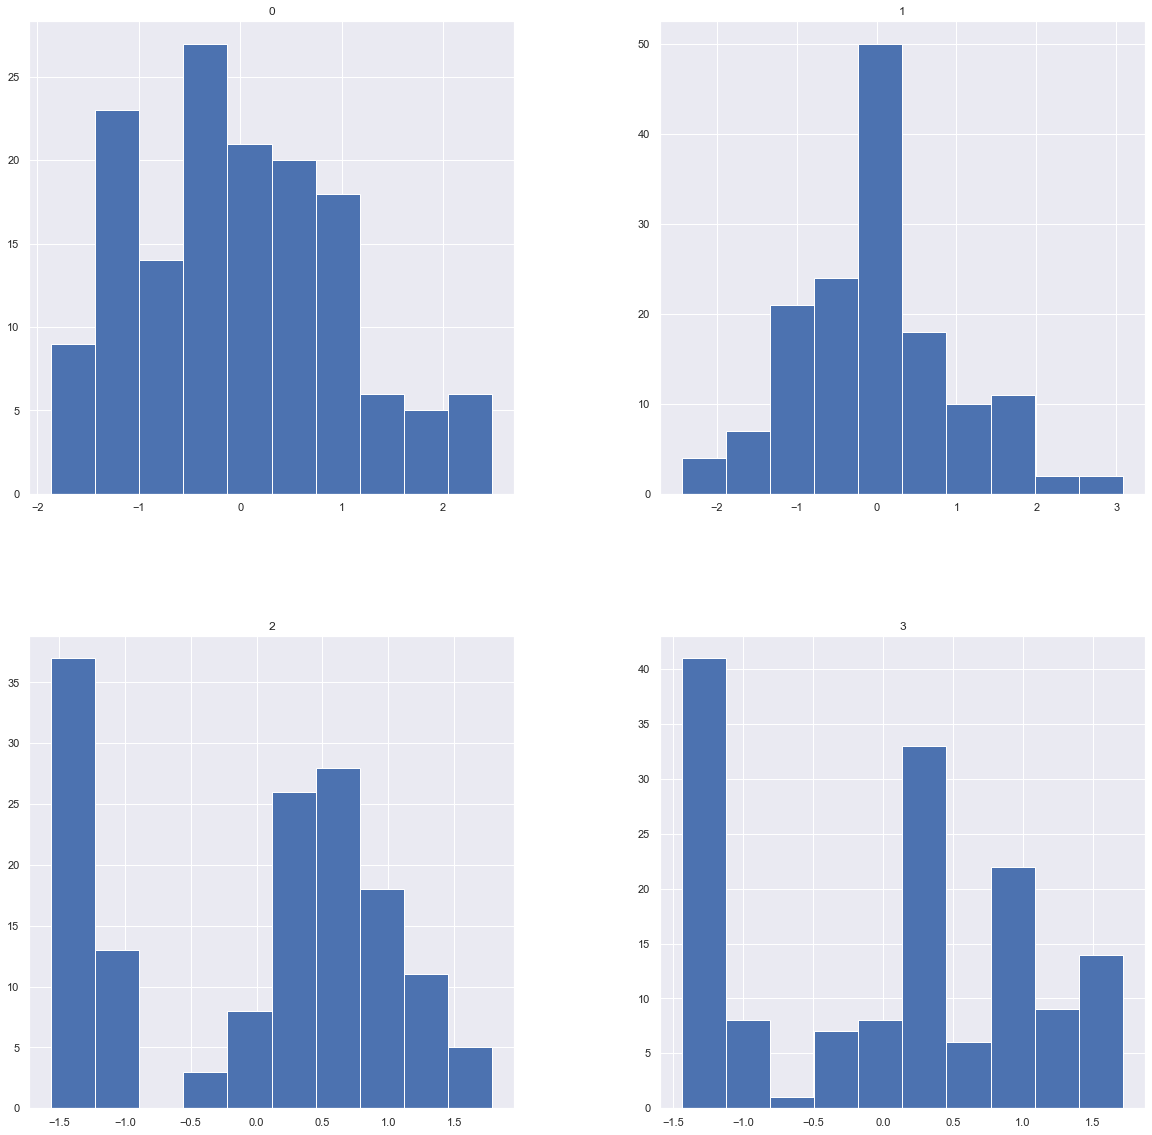

In [42]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.908008 (+/- 0.075431)
LDA: 0.979690 (+/- 0.033781)
kNN: 0.955421 (+/- 0.047810)
 DT: 0.948368 (+/- 0.053186)
 NB: 0.953859 (+/- 0.053100)
SVM: 0.960176 (+/- 0.051577)
 RF: 0.956580 (+/- 0.044359)
 GB: 0.952425 (+/- 0.051175)
XGB: 0.953590 (+/- 0.045997)
AdaBoost: 0.945580 (+/- 0.054301)
ANN: 0.952741 (+/- 0.046916)


In [47]:
def noise(X,noise=5):
    
    from noisify.recipes import human_error
    from noisify.recipes import machine_error

    combined_noise = machine_error(noise) + human_error(noise)
    X_noise = np.empty([X.shape[0], X.shape[1]])
    
    for i in range(X.shape[1]):
        col = X[:,i]
        nos = np.array(list(combined_noise(col)))
        X_noise[:,i] = nos
        
    return X_noise

In [48]:
X_noise = noise(X_scaled)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.843030 (+/- 0.100742)
LDA: 0.864191 (+/- 0.093576)
kNN: 0.837521 (+/- 0.093965)
 DT: 0.815289 (+/- 0.109216)
 NB: 0.863469 (+/- 0.092324)
SVM: 0.853635 (+/- 0.097569)
 RF: 0.855153 (+/- 0.110768)
 GB: 0.815041 (+/- 0.107166)
XGB: 0.846865 (+/- 0.099230)
AdaBoost: 0.508244 (+/- 0.110794)
ANN: 0.851178 (+/- 0.104526)


In [76]:
## Or with another way 

In [83]:
X_n = pd.DataFrame(X_scaled)

In [84]:
X_n.head(1)

,0,1,2,3
0,-0.898033,1.012401,-1.333255,-1.308624


In [91]:
a,b = X.shape

p = 0.5 

c = round(a*p)

mean = X_n[0].mean()
sd = X_n[0].std()


for i in range(0,a,int(a/c)):
    X_n.iloc[i,0] = np.random.normal(mean,sd)


In [90]:
p = 0.5 

c = round(a*p)

mean = X_n[1].mean()
sd = X_n[1].std()


for i in range(0,a,int(a/c)):
    X_n.iloc[i,1] = np.random.normal(mean,sd)

In [89]:
p = 0.5 

c = round(a*p)

mean = X_n[2].mean()
sd = X_n[2].std()


for i in range(0,a,int(a/c)):
    X_n.iloc[i,2] = np.random.normal(mean,sd)

In [87]:
p = 0.5 

c = round(a*p)

mean = X_n[3].mean()
sd = X_n[3].std()


for i in range(0,a,int(a/c)):
    X_n.iloc[i,3] = np.random.normal(mean,sd)

In [92]:
X_n

,0,1,2,3
0,0.881135,-1.819081,-0.996775,0.245003
1,-1.139562,-0.137353,-1.333255,-1.308624
2,1.259982,0.514162,0.703340,-1.524397
3,-1.501855,0.092598,-1.276496,-1.308624
4,-0.023491,0.725917,-0.351925,1.908367
...,...,...,...,...
144,-0.052724,0.973049,-0.998557,-0.906299
145,0.551140,-1.287108,0.710054,0.928046
146,-0.107402,-0.383180,-1.410162,0.119544
147,0.430375,0.782450,0.937088,1.454321


In [93]:
X2 = X_n.values

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.637473 (+/- 0.131222)
LDA: 0.642139 (+/- 0.126329)
kNN: 0.617278 (+/- 0.115586)
 DT: 0.616659 (+/- 0.110876)
 NB: 0.601041 (+/- 0.118637)
SVM: 0.636922 (+/- 0.129898)
 RF: 0.628823 (+/- 0.109892)
 GB: 0.638826 (+/- 0.110639)
XGB: 0.642114 (+/- 0.114437)
AdaBoost: 0.565561 (+/- 0.120532)
ANN: 0.620353 (+/- 0.124405)
